# Topic: EDA of Pfizer Vaccine Tweets 

In [1]:
#import the necessary library 
import pandas as pd
import tweepy as tw 
import json

In [144]:
#Twitter Credentials
credentials={}
credentials["CONSUMER_KEY"] = "OAW2U8TGWvy9gYalD69gKhjxz"
credentials["CONSUMER_SECRET"] = "ZLcNymL9itzN0T4mogaDVwoC7A9YqVRvZwyrbcZh77j1HX8cLX"
credentials["ACESS_TOKEN"] = "1367826435478597632-CQoCv5IGmb4lY8EAOT9S9YPF5wr18W"
credentials["ACESS_SECRET"] = "hhtrTQo84P3psSUeO7Tim4Rcn6pyjC5GIZ80oZUHCilCR"

In [145]:
#save the credentials into filename twitter key in json format
with open ('twitter_keys', 'w') as file:
    json.dump(credentials,file)

In [146]:
#load the keys for authentication purpose 
with open ('twitter_keys', 'r') as file:
    twt_keys = json.load(file)

# API Authentication 

In [147]:
auth = tw.OAuthHandler(twt_keys['CONSUMER_KEY'],twt_keys['CONSUMER_SECRET'])
auth.set_access_token(twt_keys['ACESS_TOKEN'],twt_keys['ACESS_SECRET'])
api = tw.API(auth, wait_on_rate_limit=True)

## Query for Tweets Extraction 

In [148]:
search_words = "pfizer covid 19 vaccine"
date_since = "2021-03-01"
# Collect tweets
tweets_pf = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(5000)

In [150]:
from tqdm import tqdm
tweet_copy = []
for tweet in tqdm(tweets_pf):
    tweet_copy.append(tweet)

5000it [16:16,  5.12it/s]


In [61]:
len(tweet_copy)

5000

# Passing the Data In Frame Using Pandas 

In [151]:
#create a dictionary 
pf_dict = {'user_name': [], 'user_date':[],'text':[],'favorite_count':[], 'location': [], 'sources': [],'followers':[], 'ver_acct': []}
#pandas frame set up
for tweet in tqdm(tweet_copy):
    pf_dict['user_name'].append(tweet.user.name)
    pf_dict['user_date'].append(tweet.created_at)
    pf_dict['text'].append(tweet.text)
    pf_dict['favorite_count'].append(tweet.user.favourites_count)
    pf_dict['location'].append(tweet.user.location)
    pf_dict['sources'].append(tweet.source)
    pf_dict['followers'].append(tweet.user.followers_count)
    pf_dict['ver_acct'].append(tweet.user.verified)

100%|███████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 69629.57it/s]


In [152]:
#convert data to dataframe
df_tweet = pd.DataFrame(pf_dict)

In [70]:
#length
len(df_tweet)

5000

In [153]:
#columns
df_tweet.columns

Index(['user_name', 'user_date', 'text', 'favorite_count', 'location',
       'sources', 'followers', 'ver_acct'],
      dtype='object')

In [155]:
df_tweet.tail(10)

,user_name,user_date,text,favorite_count,location,sources,followers,ver_acct
4990,love America,2021-04-11 17:08:44,Not my children. People are still getting COVID-19 after being vaccinated? This China virus is not killing kids.... https://t.co/3ers8ioj7v,43520,Everywere,Twitter for iPhone,270,False
4991,Julie Viens,2021-04-11 17:08:16,RT @LTSmash420: Pfizer COVID-19 shot less effective against South African variant: study\n\n#B1351\n#SARSCoV2 #Covid19\n@ALEX451618 @Jul101Vie…,14067,"Québec, Canada",Twitter Web App,184,False
4992,🅹🅾🅴 🔬⚛️ Pfizer 2/2 💉 💪,2021-04-11 17:07:57,Pfizer COVID-19 shot less effective against South African variant: study\n\n#B1351\n#SARSCoV2 #Covid19\n@ALEX451618… https://t.co/kU8faQcSYr,342146,,Twitter for Android,6030,False
4993,Robert Nanni,2021-04-11 17:07:14,"@ashaughn ""Maxine Koskie says when she heard she wouldn't be getting the Pfizer-BioNTech COVID-19 vaccine as planne… https://t.co/dtPIYsumRf",17958,"Toronto, Ontario",Twitter Web App,1170,False
4994,twittans,2021-04-11 17:06:05,Israel COVID-19 study finds South Africa variant able to 'break through' Pfizer vaccine https://t.co/KmEg2EmX0P https://t.co/VZGl8NYev0,4,,dlvr.it,2791,False
4995,River (they/them) 🏳️‍⚧️🏳️‍🌈🗽🩸🦷✡️,2021-04-11 17:05:47,"RT @voxdotcom: No, Johnson &amp; Johnson isn't ""worse"" than the Pfizer/BioNTech Covid-19 vaccine.\n\nThis video explains why you can't judge them…",208405,"Boston, MA",Twitter for Android,6671,False
4996,LesRhoads🌊🌊🌊,2021-04-11 17:05:27,"RT @Jay_USMC2: The coronavirus variant discovered in S. Africa can “break through” Pfizer/BioNTech’s COVID-19 vaccine to some extent, a rea…",216957,Bremerton WA,Twitter for Android,17855,False
4997,"Norby, Truth Seeking Dragon of the Southern Lands",2021-04-11 17:05:02,"RT @voxdotcom: No, Johnson &amp; Johnson isn't ""worse"" than the Pfizer/BioNTech Covid-19 vaccine.\n\nThis video explains why you can't judge them…",392267,🌎of Mystery,Twitter for iPhone,19132,False
4998,CO Vax Alerts,2021-04-11 17:05:00,"New availability: Centura\nDicks Sporting Goods Park Lot H (Pfizer Vaccine): 6000 Victory Way, Commerce City, CO 800… https://t.co/feP5CfRIs3",222,,,11429,False
4999,Tissyana Camacho,2021-04-11 17:04:47,"RT @voxdotcom: No, Johnson &amp; Johnson isn't ""worse"" than the Pfizer/BioNTech Covid-19 vaccine.\n\nThis video explains why you can't judge them…",4868,,Twitter Web App,514,False


In [156]:
#optimizing the size of the notebook 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [77]:
df_tweet.head(10)

,user_name,user_date,text,favorite_count,location,sources,followers
0,Migz 🐺 tfatws era,2021-04-12 10:09:38,"RT @cnnphilippines: The country is expecting some 2.4 million doses of COVID-19 vaccines from Pfizer, with the shipment seen to arrive by e…",29560,No Way Home,Twitter for Android,73
1,Brooke Shafer,2021-04-12 10:09:35,A reminder on criteria: Everyone 18+ can get any Covid-19 vaccine.\n\n16 and 17 year olds can only get the Pfizer vac… https://t.co/DgEo0mK8yd,2116,"Miami, FL",Twitter for iPhone,2479
2,reJUVEnation 🎙⚪️⚫️,2021-04-12 10:08:03,RT @CP24: Canada to receive 1 million does of coronavirus vaccine this week; all from Pfizer-BioNTech\nhttps://t.co/Z3n2gq1Ec8,51552,Canada,Twitter for iPhone,1945
3,tuktuk,2021-04-12 10:06:44,"RT @cnnphilippines: The country is expecting some 2.4 million doses of COVID-19 vaccines from Pfizer, with the shipment seen to arrive by e…",12577,,Twitter for iPhone,402
4,CO Vax Alerts,2021-04-12 10:06:27,"New availability: Centura\nDicks Sporting Goods Park Lot H (Pfizer Vaccine): 6000 Victory Way, Commerce City, CO 800… https://t.co/D27GEkBhJd",221,,,11546
5,News18.com,2021-04-12 10:06:22,"For vaccine expansion, Sputnik V, J&amp;J, Pfizer and more vaccines may have to be exempt from bridging trials.… https://t.co/Yon9uBC2li",56,India,TweetDeck,150989
6,Dion Groot,2021-04-12 10:04:08,"RT @Alicia1984N: ""A team from Tel Aviv University and Clalit Health Services found that the prevalence of the South Africa variant among pa…",403,,Twitter for iPhone,74
7,yza💙🐧 aka Violetlady,2021-04-12 10:01:45,"RT @cnnphilippines: The country is expecting some 2.4 million doses of COVID-19 vaccines from Pfizer, with the shipment seen to arrive by e…",18501,Republic of the Philippines,Twitter Web App,362
8,JD,2021-04-12 10:01:21,"RT @cnnphilippines: The country is expecting some 2.4 million doses of COVID-19 vaccines from Pfizer, with the shipment seen to arrive by e…",31818,"Laguna, Philippines",Twitter for Android,404
9,"MJ ♡ 말니 ᴹᴬᴵᴺᴱ | Walang ganun, mars! 😅 ♡",2021-04-12 10:00:31,"RT @cnnphilippines: The country is expecting some 2.4 million doses of COVID-19 vaccines from Pfizer, with the shipment seen to arrive by e…",36602,Makati City,Twitter for Android,1088


In [156]:
#Save the extracted data 
df_tweet.to_csv('tweet_extract2.csv')

## Data Wrangling and Cleaning 

In [79]:
#inspect the information about the data 
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_name       5000 non-null   object        
 1   user_date       5000 non-null   datetime64[ns]
 2   text            5000 non-null   object        
 3   favorite_count  5000 non-null   int64         
 4   location        5000 non-null   object        
 5   sources         5000 non-null   object        
 6   followers       5000 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 273.6+ KB


In [3]:
#re read save data back into the notebook and parse the datetime 
df2= pd.read_csv('clean_df.csv',parse_dates= ['user_date'])

In [158]:
data_tweet.tail (30)

,Unnamed: 0,user_name,user_date,text,favorite_count,location,sources,followers,ver_acct
4970,4970,MSNRN007 👩🏾‍⚕️Crystal 🔥🔥🔥,2021-04-11 17:18:59,"RT @Jay_USMC2: The coronavirus variant discovered in S. Africa can “break through” Pfizer/BioNTech’s COVID-19 vaccine to some extent, a rea…",33449,Good old USA,Twitter for Android,20242,False
4971,4971,Andrew Cove,2021-04-11 17:18:53,"RT @cmorten2: But, as Pfizer's CFO just said out loud, those vaccine makers now have enormous financial incentives to perpetuate the pandem…",17405,"Breckenridge, CO",Twitter Web App,1812,False
4972,4972,Sharon - Shih Tzu Mom,2021-04-11 17:18:15,"RT @Jay_USMC2: The coronavirus variant discovered in S. Africa can “break through” Pfizer/BioNTech’s COVID-19 vaccine to some extent, a rea…",150737,NaN,Twitter for iPad,8562,False
4973,4973,Helen-I 👀 in 2016,2021-04-11 17:17:46,"RT @Jay_USMC2: The coronavirus variant discovered in S. Africa can “break through” Pfizer/BioNTech’s COVID-19 vaccine to some extent, a rea…",152430,NaN,Twitter Web App,1260,False
4974,4974,V Jacks,2021-04-11 17:17:16,"RT @nytimes: Dr. Katalin Kariko, known to colleagues as Kati, has emerged as one of the heroes of Covid-19 vaccine development. Her work wi…",12446,"Boston, MA",Twitter for iPhone,175,False
4975,4975,Human Up Magazine,2021-04-11 17:17:12,RT @TimesLIVE: The coronavirus variant discovered in SA may evade the protection provided by Pfizer/BioNTech's Covid-19 vaccine to some ext…,1422,"Johannesburg, South Africa",Twitter for Android,1332,False
4976,4976,adamheath,2021-04-11 17:16:03,"RT @nytimes: Dr. Katalin Kariko, known to colleagues as Kati, has emerged as one of the heroes of Covid-19 vaccine development. Her work wi…",19612,Laguna Beach,Twitter Web App,134,False
4977,4977,@pharmoto,2021-04-11 17:15:30,"RT @CardiacConsult: 🙏 \n\n“For kids 12 and above, I think we’ll have a vaccine licensed before the 2021-2022 school year,” said Dr. Robert Fr…",18794,New York,Twitter for iPhone,228,False
4978,4978,Anne Bologna,2021-04-11 17:15:05,"RT @nytimes: Dr. Katalin Kariko, known to colleagues as Kati, has emerged as one of the heroes of Covid-19 vaccine development. Her work wi…",27,NYC,Twitter for iPhone,445,False
4979,4979,NYC Vaccine Bot,2021-04-11 17:13:58,"Vaccine appointments are available at\n\nWalgreens/Duane Reade (Pfizer)\n2864 Broadway, Manhattan, NY, 10025\n(800) 925… https://t.co/nfw7YeYHC6",20,"New York, NY",NYC Vaccine Bot,1853,False


In [160]:
data_tweet.tail ()

,user_name,user_date,text,favorite_count,location,sources,followers,ver_acct
4995,River (they/them) 🏳️‍⚧️🏳️‍🌈🗽🩸🦷✡️,2021-04-11 17:05:47,"RT @voxdotcom: No, Johnson &amp; Johnson isn't ""worse"" than the Pfizer/BioNTech Covid-19 vaccine.\n\nThis video explains why you can't judge them…",208405,"Boston, MA",Twitter for Android,6671,False
4996,LesRhoads🌊🌊🌊,2021-04-11 17:05:27,"RT @Jay_USMC2: The coronavirus variant discovered in S. Africa can “break through” Pfizer/BioNTech’s COVID-19 vaccine to some extent, a rea…",216957,Bremerton WA,Twitter for Android,17855,False
4997,"Norby, Truth Seeking Dragon of the Southern Lands",2021-04-11 17:05:02,"RT @voxdotcom: No, Johnson &amp; Johnson isn't ""worse"" than the Pfizer/BioNTech Covid-19 vaccine.\n\nThis video explains why you can't judge them…",392267,🌎of Mystery,Twitter for iPhone,19132,False
4998,CO Vax Alerts,2021-04-11 17:05:00,"New availability: Centura\nDicks Sporting Goods Park Lot H (Pfizer Vaccine): 6000 Victory Way, Commerce City, CO 800… https://t.co/feP5CfRIs3",222,NaN,NaN,11429,False
4999,Tissyana Camacho,2021-04-11 17:04:47,"RT @voxdotcom: No, Johnson &amp; Johnson isn't ""worse"" than the Pfizer/BioNTech Covid-19 vaccine.\n\nThis video explains why you can't judge them…",4868,NaN,Twitter Web App,514,False


In [161]:
#inspect the datetime parsed ealier 
data_tweet.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_name       5000 non-null   object        
 1   user_date       5000 non-null   datetime64[ns]
 2   text            5000 non-null   object        
 3   favorite_count  5000 non-null   int64         
 4   location        3492 non-null   object        
 5   sources         4930 non-null   object        
 6   followers       5000 non-null   int64         
 7   ver_acct        5000 non-null   bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(4)
memory usage: 278.4+ KB


In [162]:
#missing value inspection 
data_tweet.isnull().any()

user_name         False
user_date         False
text              False
favorite_count    False
location           True
sources            True
followers         False
ver_acct          False
dtype: bool

In [37]:
import numpy as np 
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns

In [38]:
# defining a function for Missing Value count and percentage 
'''
input : data 
output: columns with Missing values (count and percentage)
'''
def missing_data(data):
    total = data.isnull().sum()# assign a variable to overall total number of null value in the data set 
    percent = (data.isnull().sum()/data.isnull().count()*100) # calculate the percentage and assign to variable 'percent'
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) #create a dataFrame that concat 'total'and 'percent'
    types = [] # create an empty set 
    for col in data.columns:#loop through all the columns 
        dtype = str(data[col].dtype) #assign type of each column to dtype 
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt)) 

In [39]:
#missing value table 
missing_data(data_tweet)

,user_name,user_date,text,favorite_count,location,sources,followers
Total,0,0,0,0,1456,59,0
Percent,0,0,0,0,29.12,1.18,0
Types,object,datetime64[ns],object,int64,object,object,int64


# Drop NaN

In [5]:
#drop the unwanted columns after reading in the data 
data_tweet.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
#drop nan value in the data set 
df = data_tweet.dropna(axis=0)
df.reset_index(drop=True)
df.head(10)

,user_name,user_date,text,favorite_count,location,sources,followers,ver_acct
0,Jeff Smith,2021-04-13 11:18:34,RT @dawnymock: I see it’s going around with si...,6031,Charlottetown PEI Canada,Twitter Web App,4891,False
1,WDP,2021-04-13 11:18:33,An important milestone for our client Movianto...,718,Benelux - France - Romania,Twitter Web App,767,False
2,rm,2021-04-13 11:17:51,RT @surajbrf: Think SII is doing badly ? Compa...,14678,"Dehradun, Uttaranchal",TweetDeck,491,False
3,rm,2021-04-13 11:17:32,RT @surajbrf: So far we have been fortunate. E...,14678,"Dehradun, Uttaranchal",TweetDeck,491,False
5,ANGELA HUFFMAN,2021-04-13 11:14:42,"RT @ABC: While ""breakthrough"" COVID-19 cases—p...",226099,"TUSKEGEE,ALABAMA",Twitter for Android,2110,False
6,Diamo i numeri 🇪🇺,2021-04-13 11:14:32,RT @StatistaCharts: Israel has had great succe...,79279,"Milano, Lombardia",Twitter Web App,665,False
7,NYC Vaccine Bot,2021-04-13 11:13:26,Vaccine appointments are available at\n\nWalgr...,20,"New York, NY",NYC Vaccine Bot,1854,False
8,Gerbil King Lemmiwinks,2021-04-13 11:12:36,RT @dawnymock: I see it’s going around with si...,25120,In a onesie watching Spiderman,Twitter for iPhone,237,False
9,Political Perusal,2021-04-13 11:11:00,"RT @ABC: While ""breakthrough"" COVID-19 cases—p...",46,World,Twitter Web App,377,False
11,Lauren Coleman,2021-04-13 11:09:51,Daniel Espinosa knew he was eligible for only ...,4711,"Greensboro, NC",Twitter for iPhone,2728,False


In [164]:
len(df)

3477

In [6]:
df.isnull().any ()

user_name         False
user_date         False
text              False
favorite_count    False
location          False
sources           False
followers         False
ver_acct          False
dtype: bool

In [42]:
df.columns

Index(['user_name', 'user_date', 'text', 'favorite_count', 'location',
       'sources', 'followers'],
      dtype='object')

In [155]:
import warnings
warnings.filterwarnings('ignore')

## Clean Up the User_name and Text

In [10]:
#from the previous section we move from dropping the missing value now we want to clean-up the text and user_name column 
#using Regular_Expression 
import re 
#Preprocessing for Text:
#remove all the url
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+','',x))
#remove twitter handler
df['text']=df['text'].apply(lambda x: re.sub('@[^\s]+','',x))
#remove single words 
df['text'] = df['text'].apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+','',x))
#Cleaning the User_name
#remove special character 
#df['user_name'] = df['user_name'].apply(lambda x: ''.join(re.findall(r'\w+',x)))

In [168]:
df.head (10)

,user_name,user_date,text,favorite_count,location,sources,followers,ver_acct
0,JeffSmith,2021-04-13 11:18:34,RTsee it’s going around with signature cropped....so here is the original:) #covid 19 #vaccine #pfizer #moderna #AstraZenica…,6031,Charlottetown PEI Canada,Twitter Web App,4891,False
1,WDP,2021-04-13 11:18:33,"An important milestone for our client Movianto and for the Netherlands in general. Next to the Pfizer, Moderna and…",718,Benelux - France - Romania,Twitter Web App,767,False
2,rm,2021-04-13 11:17:51,"RT Think SII is doing badly ? Compared to their 270m production by end March, Pfizer, Moderna, JJ committed tocombined 240m b…",14678,"Dehradun, Uttaranchal",TweetDeck,491,False
3,rm,2021-04-13 11:17:32,RT So far we have been fortunate. EU bought half of Pfizer production only to be massively delayed: . Pf…,14678,"Dehradun, Uttaranchal",TweetDeck,491,False
5,ANGELAHUFFMAN,2021-04-13 11:14:42,"RT While ""breakthrough"" COVID-19 cases—people who get infected or sick despite being vaccinated—are extremely rare, health experts ha…",226099,"TUSKEGEE,ALABAMA",Twitter for Android,2110,False
6,Diamoinumeri,2021-04-13 11:14:32,RT Israel has had great success with its Covid vaccination program after gettinghead start by agreeing to share data wi…,79279,"Milano, Lombardia",Twitter Web App,665,False
7,NYCVaccineBot,2021-04-13 11:13:26,"Vaccine appointments are available at\n\nWalgreens/Duane Reade (Pfizer)\n541 West 235th Street, Bronx, NY, 10463\n(800)…",20,"New York, NY",NYC Vaccine Bot,1854,False
8,GerbilKingLemmiwinks,2021-04-13 11:12:36,RTsee it’s going around with signature cropped....so here is the original:) #covid 19 #vaccine #pfizer #moderna #AstraZenica…,25120,In a onesie watching Spiderman,Twitter for iPhone,237,False
9,PoliticalPerusal,2021-04-13 11:11:00,"RT While ""breakthrough"" COVID-19 cases—people who get infected or sick despite being vaccinated—are extremely rare, health experts ha…",46,World,Twitter Web App,377,False
11,LaurenColeman,2021-04-13 11:09:51,"Daniel Espinosa knew he was eligible for only the Pfizer vaccine, but was given Johnson &amp; Johnson. Medical experts…",4711,"Greensboro, NC",Twitter for iPhone,2728,False


In [169]:
df.tail(10)

,user_name,user_date,text,favorite_count,location,sources,followers,ver_acct
4985,TiredSapho,2021-04-11 17:11:36,"RT Dr. Katalin Kariko, known to colleagues as Kati, has emerged as one of the heroes of Covid-19 vaccine development. Her work wi…",68974,United States,Twitter for iPhone,62,False
4986,frankdisler,2021-04-11 17:10:41,"RT No, Johnson &amp; Johnson isn't ""worse"" than the Pfizer/BioNTech Covid-19 vaccine.\n\nThis video explains why you can't judge them…",161131,United States,Twitter for iPad,3777,False
4987,MuhamamdWaqas,2021-04-11 17:10:26,"RT The coronavirus variant discovered in South Africa can ""break through"" Pfizer/BioNTech's COVID-19 vaccine to some extent…",3801,Islamabad,Twitter for Android,119,False
4989,AnnaAnthro,2021-04-11 17:08:56,"RT If the AstraZeneca vaccine matches Pfizer’s efficacy, which now appears likely, it could playleading role in ending th…",46732,Montréal. Tio’tia:ke.,Twitter for iPhone,2665,False
4990,loveAmerica,2021-04-11 17:08:44,Not my children. People are still getting COVID-19 after being vaccinated? This China virus is not killing kids....,43520,Everywere,Twitter for iPhone,270,False
4991,JulieViens,2021-04-11 17:08:16,RT Pfizer COVID-19 shot less effective against South African variant: study\n\n#B1351\n#SARSCoV2 #Covid19\n,14067,"Québec, Canada",Twitter Web App,184,False
4993,RobertNanni,2021-04-11 17:07:14,"""Maxine Koskie says when she heard she wouldn't be getting the Pfizer-BioNTech COVID-19 vaccine as planne…",17958,"Toronto, Ontario",Twitter Web App,1170,False
4995,Rivertheythem,2021-04-11 17:05:47,"RT No, Johnson &amp; Johnson isn't ""worse"" than the Pfizer/BioNTech Covid-19 vaccine.\n\nThis video explains why you can't judge them…",208405,"Boston, MA",Twitter for Android,6671,False
4996,LesRhoads,2021-04-11 17:05:27,"RT The coronavirus variant discovered in S. Africa can “break through” Pfizer/BioNTech’s COVID-19 vaccine to some extent,rea…",216957,Bremerton WA,Twitter for Android,17855,False
4997,NorbyTruthSeekingDragonoftheSouthernLands,2021-04-11 17:05:02,"RT No, Johnson &amp; Johnson isn't ""worse"" than the Pfizer/BioNTech Covid-19 vaccine.\n\nThis video explains why you can't judge them…",392267,🌎of Mystery,Twitter for iPhone,19132,False


In [11]:
#remove the re_tweet
df['text'] = df['text'].apply(lambda x: x.replace('RT',''))
#remove the Hastag
df['text'] = df['text'].apply(lambda x: re.sub(r'\B#\S+','',x))

In [8]:
df.head (10)

,user_name,user_date,text,favorite_count,location,sources,followers,ver_acct
0,Jeff Smith,2021-04-13 11:18:34,see it’s going around with signature cropped.....,6031,Charlottetown PEI Canada,Twitter Web App,4891,False
1,WDP,2021-04-13 11:18:33,An important milestone for our client Movianto...,718,Benelux - France - Romania,Twitter Web App,767,False
2,rm,2021-04-13 11:17:51,Think SII is doing badly ? Compared to their...,14678,"Dehradun, Uttaranchal",TweetDeck,491,False
3,rm,2021-04-13 11:17:32,So far we have been fortunate. EU bought hal...,14678,"Dehradun, Uttaranchal",TweetDeck,491,False
5,ANGELA HUFFMAN,2021-04-13 11:14:42,"While ""breakthrough"" COVID-19 cases—people w...",226099,"TUSKEGEE,ALABAMA",Twitter for Android,2110,False
6,Diamo i numeri 🇪🇺,2021-04-13 11:14:32,Israel has had great success with its Covid ...,79279,"Milano, Lombardia",Twitter Web App,665,False
7,NYC Vaccine Bot,2021-04-13 11:13:26,Vaccine appointments are available at\n\nWalgr...,20,"New York, NY",NYC Vaccine Bot,1854,False
8,Gerbil King Lemmiwinks,2021-04-13 11:12:36,see it’s going around with signature cropped.....,25120,In a onesie watching Spiderman,Twitter for iPhone,237,False
9,Political Perusal,2021-04-13 11:11:00,"While ""breakthrough"" COVID-19 cases—people w...",46,World,Twitter Web App,377,False
11,Lauren Coleman,2021-04-13 11:09:51,Daniel Espinosa knew he was eligible for only ...,4711,"Greensboro, NC",Twitter for iPhone,2728,False


In [29]:
#remove special character from the text
df['text'] = df['text'].apply(lambda x: ''.join(re.findall(r'\w+',x)))

In [9]:
df.reset_index(drop = True, inplace = True)

In [12]:
df.head(100)

,user_name,user_date,text,favorite_count,location,sources,followers,ver_acct
0,Jeff Smith,2021-04-13 11:18:34,see it’s going around with signature cropped....so here is the original:) 19,6031,Charlottetown PEI Canada,Twitter Web App,4891,False
1,WDP,2021-04-13 11:18:33,"An important milestone for our client Movianto and for the Netherlands in general. Next to the Pfizer, Moderna and…",718,Benelux - France - Romania,Twitter Web App,767,False
2,rm,2021-04-13 11:17:51,"Think SII is doing badly ? Compared to their 270m production by end March, Pfizer, Moderna, JJ committed tocombined 240m b…",14678,"Dehradun, Uttaranchal",TweetDeck,491,False
3,rm,2021-04-13 11:17:32,So far we have been fortunate. EU bought half of Pfizer production only to be massively delayed: . Pf…,14678,"Dehradun, Uttaranchal",TweetDeck,491,False
4,ANGELA HUFFMAN,2021-04-13 11:14:42,"While ""breakthrough"" COVID-19 cases—people who get infected or sick despite being vaccinated—are extremely rare, health experts ha…",226099,"TUSKEGEE,ALABAMA",Twitter for Android,2110,False
5,Diamo i numeri 🇪🇺,2021-04-13 11:14:32,Israel has had great success with its Covid vaccination program after gettinghead start by agreeing to share data wi…,79279,"Milano, Lombardia",Twitter Web App,665,False
6,NYC Vaccine Bot,2021-04-13 11:13:26,"Vaccine appointments are available at\n\nWalgreens/Duane Reade (Pfizer)\n541 West 235th Street, Bronx, NY, 10463\n(800)…",20,"New York, NY",NYC Vaccine Bot,1854,False
7,Gerbil King Lemmiwinks,2021-04-13 11:12:36,see it’s going around with signature cropped....so here is the original:) 19,25120,In a onesie watching Spiderman,Twitter for iPhone,237,False
8,Political Perusal,2021-04-13 11:11:00,"While ""breakthrough"" COVID-19 cases—people who get infected or sick despite being vaccinated—are extremely rare, health experts ha…",46,World,Twitter Web App,377,False
9,Lauren Coleman,2021-04-13 11:09:51,"Daniel Espinosa knew he was eligible for only the Pfizer vaccine, but was given Johnson &amp; Johnson. Medical experts…",4711,"Greensboro, NC",Twitter for iPhone,2728,False


## Split Location column into country and cities 
considering the column location, it most of the location contain country and sities. hence we spilit it for prominent insight into country and cities with prevalent tweet.

In [27]:
#split column location into cities and country 
df['loca_City'] = df['location'].apply(lambda x: x.split(',')[0])

In [28]:
df.tail (10)

,user_name,user_date,text,favorite_count,location,sources,followers,ver_acct,loca_City
3467,Tired Sapho🏳️‍🌈,2021-04-11 17:11:36,"Dr. Katalin Kariko, known to colleagues as Kati, has emerged as one of the heroes of Covid-19 vaccine development. Her work wi…",68974,United States,Twitter for iPhone,62,False,United States
3468,frank disler,2021-04-11 17:10:41,"No, Johnson &amp; Johnson isn't ""worse"" than the Pfizer/BioNTech Covid-19 vaccine.\n\nThis video explains why you can't judge them…",161131,United States,Twitter for iPad,3777,False,United States
3469,Muhamamd Waqas,2021-04-11 17:10:26,"The coronavirus variant discovered in South Africa can ""break through"" Pfizer/BioNTech's COVID-19 vaccine to some extent…",3801,Islamabad,Twitter for Android,119,False,Islamabad
3470,Anna Anthro,2021-04-11 17:08:56,"If the AstraZeneca vaccine matches Pfizer’s efficacy, which now appears likely, it could playleading role in ending th…",46732,Montréal. Tio’tia:ke.,Twitter for iPhone,2665,False,Montréal. Tio’tia:ke.
3471,love America,2021-04-11 17:08:44,Not my children. People are still getting COVID-19 after being vaccinated? This China virus is not killing kids....,43520,Everywere,Twitter for iPhone,270,False,Everywere
3472,Julie Viens,2021-04-11 17:08:16,Pfizer COVID-19 shot less effective against South African variant: study\n\n\n \n,14067,"Québec, Canada",Twitter Web App,184,False,Québec
3473,Robert Nanni,2021-04-11 17:07:14,"""Maxine Koskie says when she heard she wouldn't be getting the Pfizer-BioNTech COVID-19 vaccine as planne…",17958,"Toronto, Ontario",Twitter Web App,1170,False,Toronto
3474,River (they/them) 🏳️‍⚧️🏳️‍🌈🗽🩸🦷✡️,2021-04-11 17:05:47,"No, Johnson &amp; Johnson isn't ""worse"" than the Pfizer/BioNTech Covid-19 vaccine.\n\nThis video explains why you can't judge them…",208405,"Boston, MA",Twitter for Android,6671,False,Boston
3475,LesRhoads🌊🌊🌊,2021-04-11 17:05:27,"The coronavirus variant discovered in S. Africa can “break through” Pfizer/BioNTech’s COVID-19 vaccine to some extent,rea…",216957,Bremerton WA,Twitter for Android,17855,False,Bremerton WA
3476,"Norby, Truth Seeking Dragon of the Southern Lands",2021-04-11 17:05:02,"No, Johnson &amp; Johnson isn't ""worse"" than the Pfizer/BioNTech Covid-19 vaccine.\n\nThis video explains why you can't judge them…",392267,🌎of Mystery,Twitter for iPhone,19132,False,🌎of Mystery


In [7]:
df['loca_country'] = df['location'].apply(lambda x: x.split(',')[-1])

In [8]:
df.head (20)

,user_name,user_date,text,favorite_count,location,sources,followers,ver_acct,loca_country
0,Jeff Smith,2021-04-13 11:18:34,RT @dawnymock: I see it’s going around with si...,6031,Charlottetown PEI Canada,Twitter Web App,4891,False,Charlottetown PEI Canada
1,WDP,2021-04-13 11:18:33,An important milestone for our client Movianto...,718,Benelux - France - Romania,Twitter Web App,767,False,Benelux - France - Romania
2,rm,2021-04-13 11:17:51,RT @surajbrf: Think SII is doing badly ? Compa...,14678,"Dehradun, Uttaranchal",TweetDeck,491,False,Uttaranchal
3,rm,2021-04-13 11:17:32,RT @surajbrf: So far we have been fortunate. E...,14678,"Dehradun, Uttaranchal",TweetDeck,491,False,Uttaranchal
5,ANGELA HUFFMAN,2021-04-13 11:14:42,"RT @ABC: While ""breakthrough"" COVID-19 cases—p...",226099,"TUSKEGEE,ALABAMA",Twitter for Android,2110,False,ALABAMA
6,Diamo i numeri 🇪🇺,2021-04-13 11:14:32,RT @StatistaCharts: Israel has had great succe...,79279,"Milano, Lombardia",Twitter Web App,665,False,Lombardia
7,NYC Vaccine Bot,2021-04-13 11:13:26,Vaccine appointments are available at\n\nWalgr...,20,"New York, NY",NYC Vaccine Bot,1854,False,NY
8,Gerbil King Lemmiwinks,2021-04-13 11:12:36,RT @dawnymock: I see it’s going around with si...,25120,In a onesie watching Spiderman,Twitter for iPhone,237,False,In a onesie watching Spiderman
9,Political Perusal,2021-04-13 11:11:00,"RT @ABC: While ""breakthrough"" COVID-19 cases—p...",46,World,Twitter Web App,377,False,World
11,Lauren Coleman,2021-04-13 11:09:51,Daniel Espinosa knew he was eligible for only ...,4711,"Greensboro, NC",Twitter for iPhone,2728,False,NC


In [142]:
df.head (2)

,user_name,user_date,text,favorite_count,location,sources,followers,loca_City,loca_country
0,Migztfatwsera,2021-04-12 10:09:38,"The country is expecting some 2.4 million doses of COVID-19 vaccines from Pfizer, with the shipment seen to arrive by e…",29560,No Way Home,Twitter for Android,73,No Way Home,No Way Home
1,BrookeShafer,2021-04-12 10:09:35,A reminder on criteria: Everyone 18+ can get any Covid-19 vaccine.\n\n16 and 17 year olds can only get the Pfizer vac…,2116,"Miami, FL",Twitter for iPhone,2479,Miami,FL


## Visualization 

In [71]:
#install wordcloud
!pip install wordcloud

In [72]:
#install ploty 
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=797a8bbe923d0afeccd54ae959df2ec1671b044dd82550ddbb4fd1377fc77c21
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [2]:
#import important library 
from nltk.corpus import stopwords
import re 
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
#Advance Data Visualization 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

In [129]:
#the column of the data set 
df.columns

Index(['user_name', 'user_date', 'text', 'favorite_count', 'location',
       'sources', 'followers', 'loca_City', 'loca_country'],
      dtype='object')

In [130]:
#create another column
df_loc2 = df.groupby('loca_City').count()['text'].reset_index().sort_values(by = 'text', ascending = False)

In [40]:
#feature Engineering 
df_country = df.groupby('loca_country').count()['text'].reset_index().sort_values(by = 'text', ascending = False)

In [41]:
len(df_country)

1369

In [62]:
df['loca_country'] = df['loca_country'].apply(lambda x: x.replace('USAs','USA').replace('Scotland','UK').replace('United States','USA'))

In [66]:
df.columns

Index(['user_name', 'user_date', 'text', 'favorite_count', 'location',
       'sources', 'followers', 'ver_acct', 'loca_City', 'loca_country'],
      dtype='object')

## Task 1: 
When the tweet of trending 'PFIZER COVID 19 VACCINE' started at each Location 

In [67]:
px.histogram(df, x="user_date",nbins=100,opacity=.5,title="Tweets by date")

In [69]:
#Scatter Plot of Tweet with Favorite count by Date ....Hoovering over Various location
px.scatter(df,x="user_date",y="favorite_count",size="favorite_count",hover_data=['loca_country'],title="Favorites_Tweet by date")

In [71]:
#seperating the date
df['year'] = df['user_date'].dt.year
df['month'] = df['user_date'].dt.month
df['day'] = df['user_date'].dt.day
df['dayofweek'] = df['user_date'].dt.dayofweek
df['hour'] = df['user_date'].dt.hour
df['minute'] = df['user_date'].dt.minute
df['dayofyear'] = df['user_date'].dt.dayofyear
df['date_only'] = df['user_date'].dt.date

In [126]:
#Date DataFrame
df_date = df['user_date'].value_counts().to_frame().reset_index().rename(columns = {'index':'date','user_date':'count'})
df_date['date']= pd.to_datetime(df_date['date'])
df_date = df_date.sort_values('date',ascending = False)

In [153]:
df_loc.head(10)

,user_name,user_date,text,favorite_count,location,sources,followers,ver_acct,loca_City,loca_country,year,month,day,dayofweek,hour,minute,dayofyear,date_only,country,tweet_date
0,Mary Holschuh,2021-04-13 11:04:10,"While ""breakthrough"" COVID-19 cases—people who get infected or sick despite being vaccinated—are extremely rare, health experts ha…",16168,"Cincinnati,ohio",Twitter for iPhone,1634,False,Cincinnati,USA,2021,4,13,1,11,4,103,2021-04-13,ohio,2021-04-13
1,$umit $ingh Parmar,2021-04-13 11:04:02,"While ""breakthrough"" COVID-19 cases—people who get infected or sick despite being vaccinated—are extremely rare, health experts ha…",73129,India,Twitter for Android,138,False,India,India,2021,4,13,1,11,4,103,2021-04-13,India,2021-04-13
2,SuiteRx,2021-04-13 10:48:57,"BREAKING: Today, with we submittedrequest to US FDA to expand emergency use of our COVID-19 vaccine to adol…",758,United States,Twitter Web App,851,False,United States,USA,2021,4,13,1,10,48,103,2021-04-13,United States,2021-04-13
3,Bhavna Vij,2021-04-13 09:56:29,"India allows Covid-19 vaccines given emergency approvals in US, UK, Japan and Europe. No pre approval bridging or clinica…",2279,New Delhi,Twitter Web App,2012,False,New Delhi,India,2021,4,13,1,9,56,103,2021-04-13,New Delhi,2021-04-13
4,Maverick L G 🇮🇳,2021-04-13 09:49:57,"Pfizer wanted Brazil, Argentina to put up military bases, Federal reserve as collateral: Why India kept Pfizer away and h…",492,India,Twitter for Android,985,False,India,India,2021,4,13,1,9,49,103,2021-04-13,India,2021-04-13
5,Matt Daniel,2021-04-13 09:48:57,Thank you for sharing!am so fascinated to see how each vaccine impacts people.had some aches a…,6397,"Birmingham, AL",Twitter Web App,3438,True,Birmingham,UK,2021,4,13,1,9,48,103,2021-04-13,AL,2021-04-13
6,⏺साकेत⏺,2021-04-13 09:48:51,"Pfizer wanted Brazil, Argentina to put up military bases, Federal reserve as collateral: Why India kept Pfizer away and h…",39414,India,Twitter for Android,923,False,India,India,2021,4,13,1,9,48,103,2021-04-13,India,2021-04-13
7,King Harold,2021-04-13 09:43:06,Adverse effects are updated &amp; published weekly here \nscr…,71496,England,Twitter Web App,1290,False,England,UK,2021,4,13,1,9,43,103,2021-04-13,England,2021-04-13
8,someone,2021-04-13 09:27:10,"Pfizer wanted Brazil, Argentina to put up military bases, Federal reserve as collateral: Why India kept Pfizer away and h…",2230,India,Twitter for Android,57,False,India,India,2021,4,13,1,9,27,103,2021-04-13,India,2021-04-13
9,Rich,2021-04-13 09:12:30,Officials have confirmed that the Moderna covid-19 vaccine will be used today for the first time in England. It's the thi…,6772,Holmfirth Yorkshire England,Twitter for iPhone,653,False,Holmfirth Yorkshire England,UK,2021,4,13,1,9,12,103,2021-04-13,Holmfirth Yorkshire England,2021-04-13


In [159]:
#extract 
tsk_nw = df_loc.loc[:, ['user_date','favorite_count','loca_country']]

In [183]:
fv_USA = tsk_nw[(tsk_nw['favorite_count'])&(tsk_nw['loca_country'] == 'USA')]
fv_UK = tsk_nw[(tsk_nw['favorite_count'])&(tsk_nw['loca_country'] == 'UK')]
fv_India = tsk_nw[(tsk_nw['favorite_count'])&(tsk_nw['loca_country'] == 'India')]
fv_Canada = tsk_nw[(tsk_nw['favorite_count'])&(tsk_nw['loca_country'] == 'Canada')]
fv_Aust = tsk_nw[(tsk_nw['favorite_count'])&(tsk_nw['loca_country'] == 'Australia')]

In [186]:
#formatting data for favorite count per previlant country
fv_USA.rename(columns = {'favorite_count':'fav_USA'},inplace = True)
fv_UK.rename(columns = {'favorite_count':'fav_UK'},inplace = True)
fv_India.rename(columns = {'favorite_count':'fav_India'},inplace = True)
fv_Canada.rename(columns = {'favorite_count':'fav_Can'},inplace = True)
fv_Aust.rename(columns = {'favorite_count':'fav_Aust'}, inplace = True)

In [223]:
#Graph of favorite counts  
fig = go.Figure ()
fig.add_trace(go.Scatter(x= fv_USA.user_date,y= fv_USA.fav_USA,
                        mode = 'lines+markers',name = 'USA',
                        line = dict(color= 'blue',width = 2, 
                                    dash='dashdot')))
fig.add_trace(go.Scatter(x = fv_India.user_date, y = fv_India.fav_India,
                        mode = 'lines+markers',name = 'India',
                        line = dict(color= 'red',width = 2, 
                                    dash='dashdot')))
fig.add_trace(go.Scatter(x = fv_UK.user_date,y=fv_UK.fav_UK,
                         mode = 'lines+markers', name = 'UK'))
fig.add_trace(go.Scatter(x = fv_Canada.user_date,y=fv_Canada.fav_Can,
                         mode = 'lines', name = 'Canda',
                         line = dict(color= 'green')))
fig.add_trace(go.Scatter(x = fv_Aust.user_date,y=fv_Aust.fav_Aust,
                         mode = 'lines+markers', name = 'Australia',
                        line = dict(color= 'firebrick',width = 2, 
                                    dash='dashdot')))
fig.update_layout(title = 'Favorite_Tweet_Count By Location',
                  xaxis_title = 'Top_5 Location', yaxis_title = 'favourite count',
                 xaxis = dict(showline = True, showgrid = False, showticklabels = True),
                 yaxis = dict(zeroline = False, showline = False, showgrid = False, showticklabels = True))


In [169]:
px.line(df_loc, x = 'user_date' ,y = 'favorite_count',labels={'x': 'Date_Time','y': 'Favorite_count'},title = 'Tweet-Count')

In [144]:
df_loc.reset_index(drop=True,inplace=True)
df_loc.head()

,user_name,user_date,text,favorite_count,location,sources,followers,ver_acct,loca_City,loca_country,year,month,day,dayofweek,hour,minute,dayofyear,date_only,country,tweet_date
0,Mary Holschuh,2021-04-13 11:04:10,"While ""breakthrough"" COVID-19 cases—people who get infected or sick despite being vaccinated—are extremely rare, health experts ha…",16168,"Cincinnati,ohio",Twitter for iPhone,1634,False,Cincinnati,USA,2021,4,13,1,11,4,103,2021-04-13,ohio,2021-04-13
1,$umit $ingh Parmar,2021-04-13 11:04:02,"While ""breakthrough"" COVID-19 cases—people who get infected or sick despite being vaccinated—are extremely rare, health experts ha…",73129,India,Twitter for Android,138,False,India,India,2021,4,13,1,11,4,103,2021-04-13,India,2021-04-13
2,SuiteRx,2021-04-13 10:48:57,"BREAKING: Today, with we submittedrequest to US FDA to expand emergency use of our COVID-19 vaccine to adol…",758,United States,Twitter Web App,851,False,United States,USA,2021,4,13,1,10,48,103,2021-04-13,United States,2021-04-13
3,Bhavna Vij,2021-04-13 09:56:29,"India allows Covid-19 vaccines given emergency approvals in US, UK, Japan and Europe. No pre approval bridging or clinica…",2279,New Delhi,Twitter Web App,2012,False,New Delhi,India,2021,4,13,1,9,56,103,2021-04-13,New Delhi,2021-04-13
4,Maverick L G 🇮🇳,2021-04-13 09:49:57,"Pfizer wanted Brazil, Argentina to put up military bases, Federal reserve as collateral: Why India kept Pfizer away and h…",492,India,Twitter for Android,985,False,India,India,2021,4,13,1,9,49,103,2021-04-13,India,2021-04-13


In [141]:
df.groupby('loca_country')['text'].count().reset_index ().sort_values('text',ascending = False)

,loca_country,text
280,USA,477
118,India,139
693,India,114
1117,USA,87
279,UK,86
45,CA,83
210,Ontario,52
261,TX,42
58,Canada,42
84,FL,36


In [142]:
df_loc = df[df['loca_country'].isin(['USA','UK','India','Canada','Australia',])]

In [143]:
df_loc.head(50)

,user_name,user_date,text,favorite_count,location,sources,followers,ver_acct,loca_City,loca_country,year,month,day,dayofweek,hour,minute,dayofyear,date_only,country,tweet_date
20,Mary Holschuh,2021-04-13 11:04:10,"While ""breakthrough"" COVID-19 cases—people who get infected or sick despite being vaccinated—are extremely rare, health experts ha…",16168,"Cincinnati,ohio",Twitter for iPhone,1634,False,Cincinnati,USA,2021,4,13,1,11,4,103,2021-04-13,ohio,2021-04-13
22,$umit $ingh Parmar,2021-04-13 11:04:02,"While ""breakthrough"" COVID-19 cases—people who get infected or sick despite being vaccinated—are extremely rare, health experts ha…",73129,India,Twitter for Android,138,False,India,India,2021,4,13,1,11,4,103,2021-04-13,India,2021-04-13
31,SuiteRx,2021-04-13 10:48:57,"BREAKING: Today, with we submittedrequest to US FDA to expand emergency use of our COVID-19 vaccine to adol…",758,United States,Twitter Web App,851,False,United States,USA,2021,4,13,1,10,48,103,2021-04-13,United States,2021-04-13
57,Bhavna Vij,2021-04-13 09:56:29,"India allows Covid-19 vaccines given emergency approvals in US, UK, Japan and Europe. No pre approval bridging or clinica…",2279,New Delhi,Twitter Web App,2012,False,New Delhi,India,2021,4,13,1,9,56,103,2021-04-13,New Delhi,2021-04-13
59,Maverick L G 🇮🇳,2021-04-13 09:49:57,"Pfizer wanted Brazil, Argentina to put up military bases, Federal reserve as collateral: Why India kept Pfizer away and h…",492,India,Twitter for Android,985,False,India,India,2021,4,13,1,9,49,103,2021-04-13,India,2021-04-13
60,Matt Daniel,2021-04-13 09:48:57,Thank you for sharing!am so fascinated to see how each vaccine impacts people.had some aches a…,6397,"Birmingham, AL",Twitter Web App,3438,True,Birmingham,UK,2021,4,13,1,9,48,103,2021-04-13,AL,2021-04-13
61,⏺साकेत⏺,2021-04-13 09:48:51,"Pfizer wanted Brazil, Argentina to put up military bases, Federal reserve as collateral: Why India kept Pfizer away and h…",39414,India,Twitter for Android,923,False,India,India,2021,4,13,1,9,48,103,2021-04-13,India,2021-04-13
67,King Harold,2021-04-13 09:43:06,Adverse effects are updated &amp; published weekly here \nscr…,71496,England,Twitter Web App,1290,False,England,UK,2021,4,13,1,9,43,103,2021-04-13,England,2021-04-13
77,someone,2021-04-13 09:27:10,"Pfizer wanted Brazil, Argentina to put up military bases, Federal reserve as collateral: Why India kept Pfizer away and h…",2230,India,Twitter for Android,57,False,India,India,2021,4,13,1,9,27,103,2021-04-13,India,2021-04-13
89,Rich,2021-04-13 09:12:30,Officials have confirmed that the Moderna covid-19 vaccine will be used today for the first time in England. It's the thi…,6772,Holmfirth Yorkshire England,Twitter for iPhone,653,False,Holmfirth Yorkshire England,UK,2021,4,13,1,9,12,103,2021-04-13,Holmfirth Yorkshire England,2021-04-13


In [136]:
#import ploty.graph_object as go
df_date = df['user_date'].value_counts().to_frame().reset_index().rename(columns = {'index':'date','user_date':'count'})
df_date['date']= pd.to_datetime(df_date['date'])
df_date = df_date.sort_values('date',ascending = False)

fig = go.Figure(go.Scatter(x= df_date['date'],
                          y=df_date['count'],
                          mode ='markers+lines',
                          name ="Submissions",
                          marker_color = 'red'))
fig.update_layout(
    title_text = 'Trend_Tweets Minutes:({} - {})'.format(df['user_date'].sort_values()[3476].strftime("%d/%m/%Y %H:%M:%S"),
                                                       df['user_date'].sort_values().iloc[-1].strftime("%d/%m/%Y %H:%M:%S")),template="plotly_dark",
    title_x=0.5)
fig.show ()

In [116]:
df_date.head()

,date,count
2,2021-04-13,635
0,2021-04-12,2174
1,2021-04-11,668


In [224]:
tweets_agg_df = df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [228]:
#function for tweet per date 
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

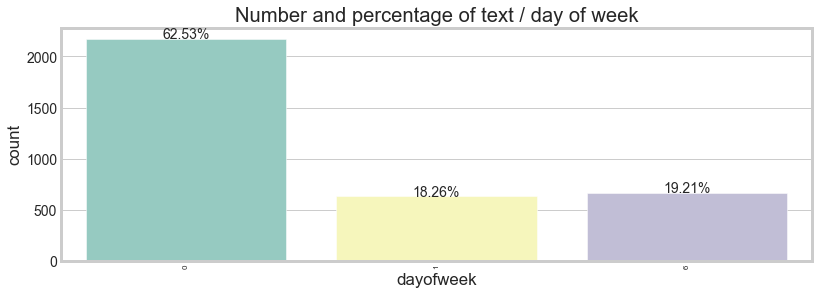

<Figure size 1440x2160 with 0 Axes>

<Figure size 1440x2160 with 0 Axes>

In [230]:
plot_count("dayofweek", "text / day of week", df, size=3, ordered=False)
plt.figure(figsize = (20,30))

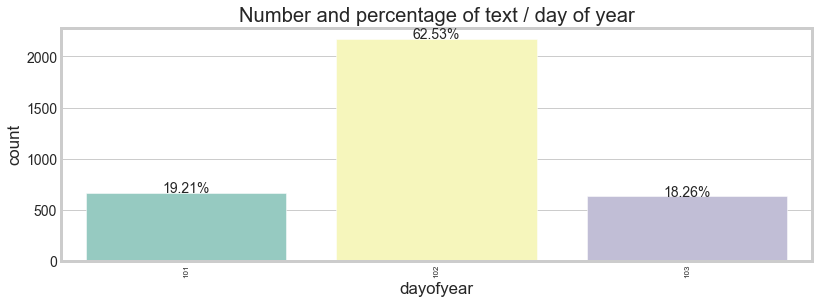

In [231]:
plot_count("dayofyear", "text / day of year", df, size=3, ordered=False)

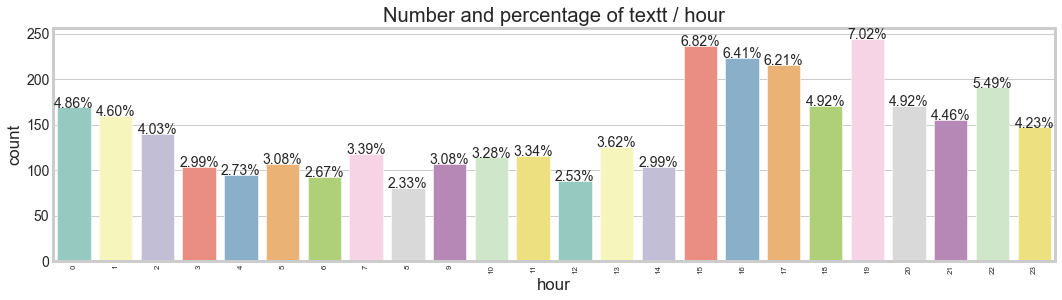

In [232]:
plot_count("hour", "text / hour", df,size=4, ordered=False)

In [111]:
df.head ()

,user_name,user_date,text,favorite_count,location,sources,followers,ver_acct,loca_country
0,Jeff Smith,2021-04-13 11:18:34,see it’s going around with signature cropped....so here is the original:) 19,6031,Charlottetown PEI Canada,Twitter Web App,4891,False,Charlottetown PEI Canada
1,WDP,2021-04-13 11:18:33,"An important milestone for our client Movianto and for the Netherlands in general. Next to the Pfizer, Moderna and…",718,Benelux - France - Romania,Twitter Web App,767,False,Benelux - France - Romania
2,rm,2021-04-13 11:17:51,"Think SII is doing badly ? Compared to their 270m production by end March, Pfizer, Moderna, JJ committed tocombined 240m b…",14678,"Dehradun, Uttaranchal",TweetDeck,491,False,Uttaranchal
3,rm,2021-04-13 11:17:32,So far we have been fortunate. EU bought half of Pfizer production only to be massively delayed: . Pf…,14678,"Dehradun, Uttaranchal",TweetDeck,491,False,Uttaranchal
5,ANGELA HUFFMAN,2021-04-13 11:14:42,"While ""breakthrough"" COVID-19 cases—people who get infected or sick despite being vaccinated—are extremely rare, health experts ha…",226099,"TUSKEGEE,ALABAMA",Twitter for Android,2110,False,ALABAMA


In [23]:
df.to_csv('clean_df.csv')

In [19]:
#USA_Clean
df['loca_country']= df['loca_country'].apply(lambda x: x.replace('NY','USA').replace('USA','USA').replace('United States','USA').replace('USA','USA').replace('New York','USA').replace('US','USA').replace ('New York City','USA'))
#Indian_clean
df['loca_country']= df['loca_country'].apply(lambda x: x.replace('India','India').replace('Delhi','India').replace('New Delhi','India'))
#UK_clean 
df['loca_country']= df['loca_country'].apply(lambda x: x.replace('London','UK').replace('United Kingdom','UK').replace('England','UK').replace('UK','UK').replace('Scotland','UK'))

In [21]:
df['loca_country']= df['loca_country'].str.replace('USAAA','USA')

## Task Two
- Bar chart by location 
- map by location 
- wordcloud by location 

In [94]:
#1. Bar chart by location
country = df["loca_country"].value_counts()
country = pd.DataFrame(country)
country.reset_index(inplace=True)

country.columns=["country","counts"]

fig = px.bar(country[country['counts']>10], x="country", y="counts",color="country",text="counts",title="Trend_Tweet_by Location")
fig.update_traces(textposition='outside')
fig.show()


In [89]:
country = pd.read_csv('con_t1.csv')

In [91]:
country.drop('Unnamed: 0',axis=1,inplace=True)

In [93]:
country.head ()

,country,counts
0,United States,819
1,India,379
2,United Kingdom,244
3,Canada,216
4,Australia,79


In [92]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  38 non-null     object
 1   counts   38 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 736.0+ bytes


In [83]:
country.dropna(axis=0,inplace = True)

In [ ]:
##2.

In [56]:
#Iso_code of country
iso_code = pd.read_csv('isocode.csv')

In [58]:
iso_code.head()

,Country,Alpha2,Alpha3,Num,ISO
0,Zimbabwe,ZW,ZWE,716,ISO 3166-2:ZW
1,Zambia,ZM,ZMB,894,ISO 3166-2:ZM
2,Yemen,YE,YEM,887,ISO 3166-2:YE
3,Western Sahara,EH,ESH,732,ISO 3166-2:EH
4,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF


In [97]:
#re read the data into the notebook
twt_data = pd.read_csv('con_t1.csv')

In [100]:
twt_data.head()

,Country,Tweets,Alpha,Iso
0,United States,819,USA,ISO 3166-2:US
1,India,379,IND,ISO 3166-2:IN
2,United Kingdom,244,UK,ISO 3166-2:GB
3,Canada,216,CA,ISO 3166-2:CA
4,Australia,79,AUS,ISO 3166-2:AU


In [99]:
twt_data.drop('Unnamed: 0',axis = 1, inplace = True)

In [107]:
#Geographical Map of tweet by location 
def plot_map(dd_df, title):
    hover_text = []
    for index, row in dd_df.iterrows():
        hover_text.append((f"Country: {row['Country']}<br>Tweets: {row['Tweets']}\
                          <br>Country code: {row['Iso']}<br>Country Alpha: {row['Alpha']}"))
    dd_df['hover_text'] = hover_text

    fig = px.choropleth(dd_df, 
                        locations="Alpha",
                        hover_name='hover_text',
                        color="Tweets",
                        projection="natural earth",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        width=900, height=700)
    fig.update_geos(   
        showcoastlines=True, coastlinecolor="DarkBlue",
        showland=True, landcolor="LightGrey",
        showocean=True, oceancolor="LightBlue",
        showlakes=True, lakecolor="Blue",
        showrivers=True, rivercolor="Blue",
        showcountries=True, countrycolor="DarkBlue"
    )
    fig.update_layout(title = title, geo_scope="world")
    fig.show()    

In [109]:
plot_map(twt_data, "Tweets per country")

In [120]:
#3. Wordcloud Tweet By Location
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=200,background_color="lightcyan").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

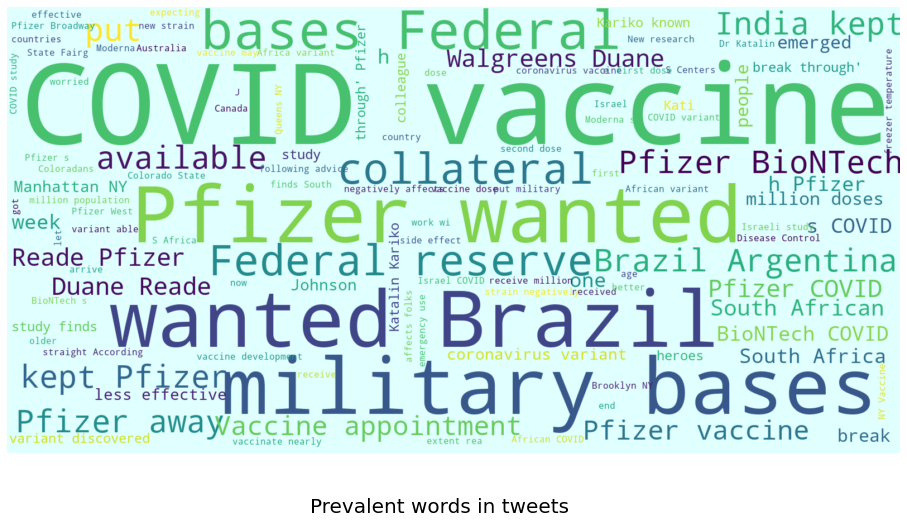

In [114]:
show_wordcloud(df['text'], title = 'Prevalent words in tweets')

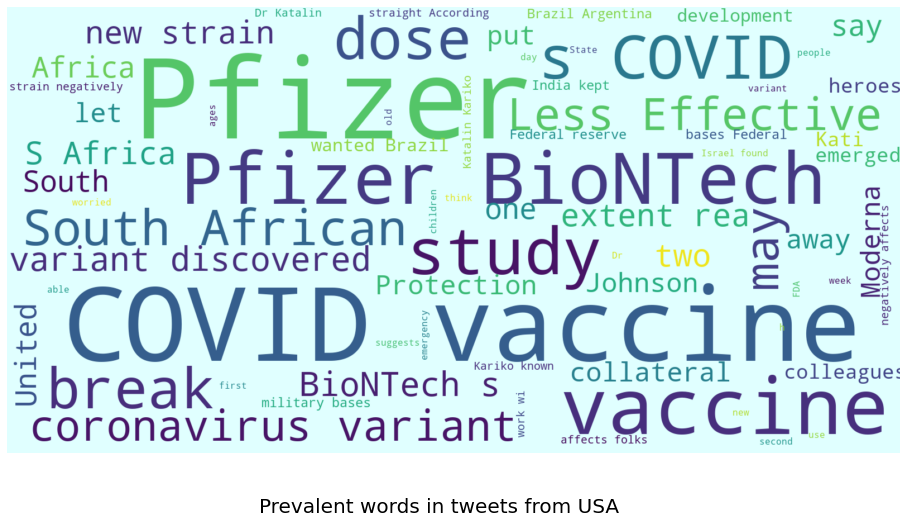

In [118]:
USA_df = df[df['loca_country'].isin(["USA",'US','United States'])]
show_wordcloud(USA_df['text'], title = 'Prevalent words in tweets from USA')

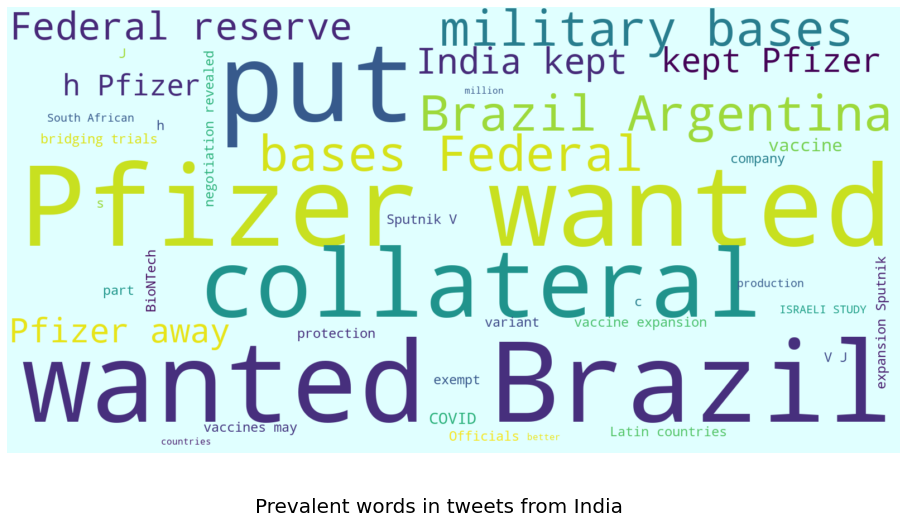

In [121]:
India_df = df[df['loca_country'].isin(['India','New Delhi','Delhi'])]
show_wordcloud(India_df['text'], title = 'Prevalent words in tweets from India')

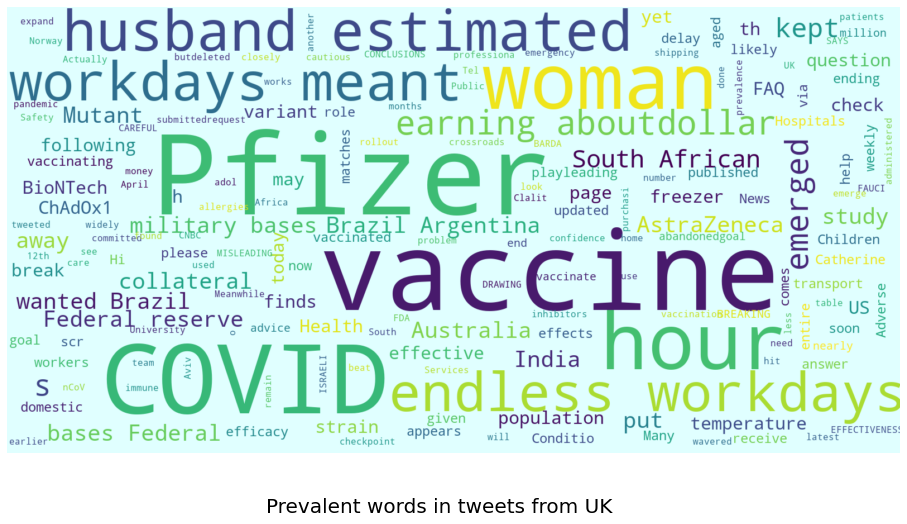

In [123]:
Uk_df = df[df['loca_country'].isin(['UK','United Kingdom','England'])]
show_wordcloud(Uk_df['text'], title = 'Prevalent words in tweets from UK')

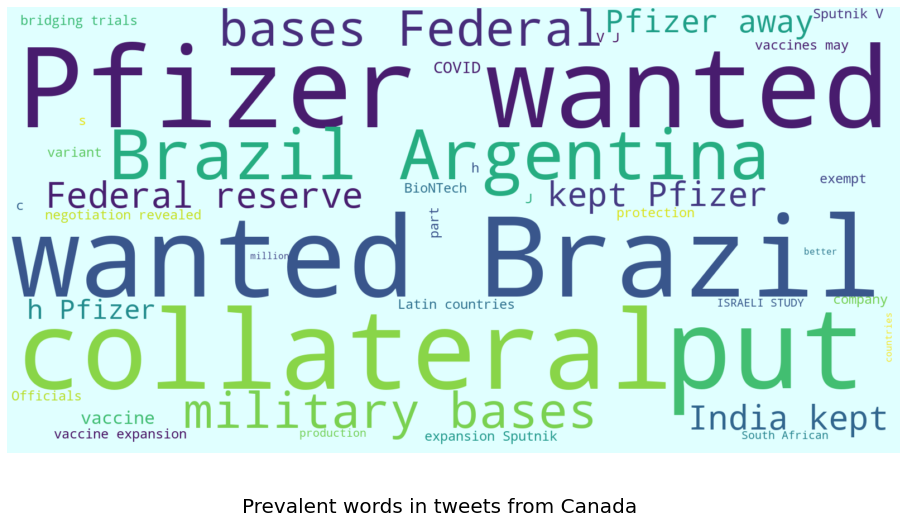

In [124]:
Canada_df = df[df['loca_country'].isin(['Canada','CA','Ontario'])]
show_wordcloud(India_df['text'], title = 'Prevalent words in tweets from Canada')

## Task 3:


In [125]:
#extract columns name
df.columns 

Index(['user_name', 'user_date', 'text', 'favorite_count', 'location',
       'sources', 'followers', 'ver_acct', 'loca_country'],
      dtype='object')

In [133]:
#Sources DataFrame
source = pd.DataFrame(df.groupby("sources")["user_name"].count())
source.reset_index(inplace=True)
source.columns=["source","count"]

fig = px.bar(source[source["count"]>10],x="source",y="count",color="source",text="count",title="Source")
fig.update_traces(textposition='outside')
fig.show()

## Task 4:

In [6]:
#verified account
ver_sour = pd.DataFrame(ver_df.groupby("sources")["user_name"].count())
ver_sour.reset_index(inplace=True)
ver_sour.columns=["veri_source","count"]

In [7]:
#extraction of unverified sources
unver_sour = pd.DataFrame(unver_df.groupby("sources")["user_name"].count())
unver_sour.reset_index(inplace=True)
unver_sour.columns=["veri_source","count"]

In [9]:
unver_sour.head(5)

,veri_source,count
60,Twitter for iPhone,895
57,Twitter for Android,877
56,Twitter Web App,798
24,NYC Vaccine Bot,271
59,Twitter for iPad,112


In [168]:
#Chart for verified Account
trace1 = go.Bar(
                x = dt['veri_source'],
                y = dt['count'],
                marker = dict(color = 'rgb(250,13,92)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=dt['count'], textposition='outside')
layout = go.Layout(template= "ggplot2",title = 'SOURCE DISTRIBUTION OF TWEETS FROM VERIFIED ACCOUNTS' , xaxis = dict(title = 'Verified_Source'), yaxis = dict(title = 'Count'), height=650)
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [14]:
#chart of Unverified Sources
trace1 = go.Bar(
                x = dt2['veri_source'],
                y = dt2['count'],
                marker = dict(color = 'rgb(250,13,92)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=dt2['count'], textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'SOURCE DISTRIBUTION OF TWEETS FROM UNVERIFIED ACCOUNTS' , xaxis = dict(title = 'Unverified_Source'), yaxis = dict(title = 'Count'), height=650)
fig = go.Figure(data = [trace1], layout = layout)
fig.show()